# Основы программирования в Python


## Домашнее задание 3

Удиев Хасан Хусейнович 

## Организационные моменты

Это домашнее задание выглядит большим и страшным, но не пугайтесь! Не все так сложно, как кажется!

Советуем посмотреть заполненные семинары, там есть все, что нужно для решения, нужно только разобраться в том, что происходит. Также не советуем копировать из интернета, не разбираясь в написанном. Как показывают результаты контрольной и прошлых домашних заданий, это не приводит ни к чему хорошему.



* Домашнее задание нужно отправить до 23:59 15 июня 2019 на адрес python.mirec.2019+hw3.%номер группы%@gmail.com, например, python.mirec.2019+hw3.171@gmail.com, если вы из группы 171.

* Тетрадка с решениями должна быть исполняемой, то есть, если запустить все ячейки от начала до конца, ошибок (из-за которых исполнение остановится) быть не должно.
  + Задачи, для решения которых предоставлен неработающий код (код, который невозможно запустить из-за наличия грубых ошибок/опечаток), не засчитываются, даже если при этом зафиксирован верный результат.
  + Если при проверке работ установлен факт нарушения академической этики, студент получает оценку «0» за данную работу. Работа студента, предоставившего свою работу для списывания, также аннулируется.
  

## Полезные ссылки

* https://google.com/
* https://stackoverflow.com/

Если у вас не получилось найти гайд/туториал/разбор вашего вопроса, это не повод отчаиваться. Ответ может прятаться в документации к библиотеке. Читать документацию совсем не страшно, и там тоже бывают очень подробные примеры.

* https://docs.python.org/3/
* https://pandas.pydata.org/pandas-docs/stable/
* https://docs.scipy.org/doc/numpy/reference/
* https://matplotlib.org/contents.html
* http://scikit-learn.org/stable/documentation.html

# Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Как и в прошлом задании, мы будем анализировать набор данных о людях с некоторыми признаками из переписи населения, связанными с их доходом. **В этот раз мы будем решать задачу бинарной классификации — предсказывать составит ли доход >50K в год или меньше.**

In [2]:
df1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
df1.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex',
              'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [3]:
df1.head()


age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

В датасете есть следующие признаки:

- `income` — >50K, <=50K. 
- `age` — continuous. 
- `workclass` —  Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- `fnlwgt` —  continuous (**a service variable for census**)
- `education` —  Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- `education-num` —  continuous. 
- `marital-status` —  Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- `occupation` —  Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- `relationship` —  Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- `race`  — White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- `sex`  — Female, Male. 
- `capital-gain` —  continuous. 
- `capital-loss` —  continuous. 
- `hours-per-week` —  continuous. 
- `native-country` —  United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



Ссылка на описание, : https://archive.ics.uci.edu/ml/datasets/Adult

# Часть 1: Подготовка данных (3б)

### Задание 1 (0.5 б)

Есть ли в каких-то признаках пропущенные значения? Если да, исключите эти объекты (людей) из выборки.

In [4]:
df = df1.dropna()
print(len(df))


32561


### Задание 2 (1 б)

1) Какие признаки, по вашему мнению, не стоит использовать для задачи классификации? Кратко поясните, почему вы так считаете. 

Не перестарайтесь с выкидыванием признаков :)

**Ответ:** столбцы capital-gain и capital-loss нужно удалить, так как большинство объектов имеют 0 в этих столбцах                  
Столбец education-num зависит от education, поэтому один из них удаляем                                
Признаки relationship и marital-status также схожи, один из них убираем                                        
Признак fnlwgt вообще не понятен

2) Исключите вышеуказанные признаки из выборки

In [5]:
del df['capital-gain']
del df['capital-loss']
del df['fnlwgt']
del df['education']
del df['relationship']
df.head()

age          workclass  education-num       marital-status  \
0   39          State-gov             13        Never-married   
1   50   Self-emp-not-inc             13   Married-civ-spouse   
2   38            Private              9             Divorced   
3   53            Private              7   Married-civ-spouse   
4   28            Private             13   Married-civ-spouse   

           occupation    race      sex  hours-per-week  native-country  income  
0        Adm-clerical   White     Male              40   United-States   <=50K  
1     Exec-managerial   White     Male              13   United-States   <=50K  
2   Handlers-cleaners   White     Male              40   United-States   <=50K  
3   Handlers-cleaners   Black     Male              40   United-States   <=50K  
4      Prof-specialty   Black   Female              40            Cuba   <=50K

### Задание 3 (1 б)

Какие признаки являются категориальными? Укажите их в строке ниже по образцу.

In [6]:
# categorical = ['feature1', 'feature2', 'etc']
categorical = ['workclass', 'marital-status', 'occupation', 'race', 'sex', 'native-country']

Теперь мы переведем эти признаки в dummies (фиктивные переменные).

In [7]:
data = pd.get_dummies(df, columns=categorical, drop_first=True)
data.columns

Index(['age', 'education-num', 'hours-per-week', 'income',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupation_ Craft-repair',
       'occupation_ Exec-managerial', 'occupation_ Farming-fishing',
       'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct',
       'occupation_ Other-service', 'occupation_ Priv-house-serv',
       'occupation_ Prof-specialty', 'occupation_ Protective-serv',
       'occupation_ Sales', 'occupation_ Tech-support',
       'occupation_ Transport-moving', 'ra

Аналогично преобразуйте целевую переменную в числовой признак.

In [8]:

data['income'] = data['income'].apply(lambda x: 0 if x.strip() == "<=50K" else 1)
data['age'] = data['age'].apply(lambda x: int(x))
data['education-num'] = data['education-num'].apply(lambda x: int(x))

### Задание 4 (0.5 б)

Разделите данные на тренировочную и тестовую выборку. Возьмите 30% данных для тестовой выборки.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
y = data['income'].values
X = data
del X['income']
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Часть 2: Обучаем модели (7 б)

Здесь мы будем обучать логистическую регрессию, дерево решений и более продвинутые методы. Но сначала нам нужно выбрать метрику качества. Подсчитайте баланс классов в данных (процент каждого класса) **(1 б)**

In [10]:
print('<=50K', 1-sum(y)/len(y))
print('>50K', sum(y)/len(y))


<=50K 0.7591904425539756
>50K 0.2408095574460244


Людей с доходом >= 50K сильно меньше, чем с доходом <50K, поэтому долю правильных ответов (accuracy) стоит использовать осторожно (вспомните почему или прочитайте статью ниже). Мы будем использовать точность (precision) и полноту (recall). 

Что значат эти метрики: 
- https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c 
- https://en.wikipedia.org/wiki/F1_score
- https://en.wikipedia.org/wiki/Precision_and_recall 

Помните, что мы решаем задачу **бинарной классификации**. 

In [11]:
from sklearn.metrics import precision_score, recall_score

### 1. Логистическая регрессия (1 б)

Обучите модель на тренировочных данных, посчитайте предсказания на тренировочных и тестовых данных, а также метрики качества.

In [12]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(solver='liblinear')

reg.fit(X_train, y_train)

pred_train = reg.predict(X_train)

pred_test = reg.predict(X_test)

In [13]:
print('Logistic Regression')
print()
print('Train precision_score: %0.3f' % precision_score(y_train, pred_train))
print('Test precision_score: %0.3f' % precision_score(y_test, pred_test))
print()
print('Train recall_score: %0.3f' % recall_score(y_train, pred_train))
print('Test recall_score: %0.3f' % recall_score(y_test, pred_test))

Logistic Regression

Train precision_score: 0.695
Test precision_score: 0.709

Train recall_score: 0.544
Test recall_score: 0.563


### 2. Дерево решений

<img src='https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png' width="300">

Попробуем улучшить качество предсказаний, используя более сложные алгоритмы. Обучим дерево решений, посчитаем предсказания и метрики аналогично предыдущей части. Что вы можете сказать о качестве модели относительно логистической регрессии? Какую проблему вы наблюдаете? **(1 б)**. 

Почему такое может произойти в случае решающего дерева? (подсказка: посмотрите на следующее задание и дайте свой ответ) **(0.5 б)**

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [15]:
print('Decision tree')
print()
print('Train precision_score: %0.3f' % precision_score(y_train, pred_train))
print('Test precision_score: %0.3f' % precision_score(y_test, pred_test))
print()
print('Train recall_score: %0.3f' % recall_score(y_train, pred_train))
print('Test recall_score: %0.3f' % recall_score(y_test, pred_test))

Decision tree

Train precision_score: 0.981
Test precision_score: 0.558

Train recall_score: 0.902
Test recall_score: 0.520


**Ответ:** Мы видим, что на тренировочной выборке наша модель показывает хорошие результаты, в то время как на тестовой - заметно хуже. Значит мы столкнулись с проблемой переобучения

Попробуем справиться с проблемой, описанной выше. Для этого попробуем изменить глубину дерева — грубо говоря, количество вопросов, которые задает дерево в модели. В `DecisionTreeClassifier` за это отвечает параметр `max_depth`. 

Подберите значение параметра, при котором, на ваш взгляд, проблема не так сильно выражена. Что вы можете сказать о качестве модели относительно логистической регрессии? **(1 б)**

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 8)
tree.fit(X_train, y_train)
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)
print('Decision tree')
print()
print('Train precision_score: %0.3f' % precision_score(y_train, pred_train))
print('Test precision_score: %0.3f' % precision_score(y_test, pred_test))
print()
print('Train recall_score: %0.3f' % recall_score(y_train, pred_train))
print('Test recall_score: %0.3f' % recall_score(y_test, pred_test))

Decision tree

Train precision_score: 0.702
Test precision_score: 0.683

Train recall_score: 0.610
Test recall_score: 0.570


**Ответ:** Значимых отличий в результатах от линейной регрессии мы не наблюдаем, но в то же время, показатель recall (доля объектов положительного класса из всех объектов положительного класса, которые нашел алгоритм) немного выше, значит наша модель сработала чуть лучше

### 3. Случайный лес

В семинаре мы рассматривали один из методов, основанный на решающих деревьях — случайный лес. Теперь попробуем обучить его и подобрать параметры. Из прошлого задания ясно, что стоит ограничить глубину дерева, поэтому для начала возьмем `max_depth=10`. Также попробуем использовать всего 30 деревьев (параметр `n_estimators`). 
Что вы можете сказать о качестве? **(1 б)**

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=30, max_depth = 10)
forest.fit(X_train, y_train)
pred_train = forest.predict(X_train)
pred_test = forest.predict(X_test)

print('Random Forest')
print()
print('Train precision_score: %0.3f' % precision_score(y_train, pred_train))
print('Test precision_score: %0.3f' % precision_score(y_test, pred_test))
print()
print('Train recall_score: %0.3f' % recall_score(y_train, pred_train))
print('Test recall_score: %0.3f' % recall_score(y_test, pred_test))

Random Forest

Train precision_score: 0.776
Test precision_score: 0.769

Train recall_score: 0.452
Test recall_score: 0.437


**Ответ:** Качество метрики precision заметно выше, чем в предыдущих моделях, однако метрика recall низкая. Значит доля положительных объектов, из всех объектов положительного класса, которые нашел наш алгоритм мала. Попробуем увеличить число деревьев и уменьшить глубину

Теперь попробуйте увеличить число деревьев и посмотреть, что случается с качеством модели. Также попробуйте изменить максимальную глубину дерева. Обычно в случайном лесе используют много деревьев небольшой глубины. С большим количеством деревьев и большой глубиной обучение может занять до минуты, не пугайтесь :)

Приведите ваши результаты. **(1 б)**

Кратко опишите, какие значения параметров вы пробовали и что наблюдали (например: "при таких-то таких-то параметрах получилось добиться 100% precision, однако recall был низким"). Сравните с предыдущей лучшей моделью и логистической регрессией. **(0.5 б)**

In [18]:
pres = []
rec = []
for i in range(1, 50):
    forest = RandomForestClassifier(n_estimators=300, max_depth = i)
    forest.fit(X_train, y_train)
    pred_train = forest.predict(X_train)
    pred_test = forest.predict(X_test)
    pres.append(precision_score(y_test, pred_test))
    rec.append(recall_score(y_test, pred_test))
    print(i)


#print('Random Forest')
#print()
#print('Train precision_score: %0.3f' % precision_score(y_train, pred_train))
#print('Test precision_score: %0.3f' % precision_score(y_test, pred_test))
#print()
#print('Train recall_score: %0.3f' % recall_score(y_train, pred_train))
#print('Test recall_score: %0.3f' % recall_score(y_test, pred_test))

D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


1


D:\Program Files (x86)\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


**Ответ**: При большом числе деревьев и маленькой глубине precision близок к 100, а recall ниже 10%                              

По сравнению с логистической регрессией и другими моделями precision заметно выше, но повышения recall добиться сложно

На этом все. Убедитесь, что ваша тетрадь воспроизводится от начала до конца (вкладка `Kernel -> Restart Kernel and Run All Cells`) и не забудьте посмотреть на бонусные задания.

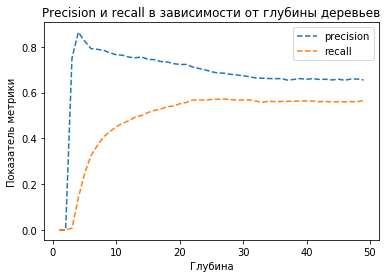

In [19]:
xx = np.arange(1, 50, 1)

plt.plot(xx, pres, '--', label='precision')
plt.plot(xx, rec, '--', label='recall')
plt.title('Precision и recall в зависимости от глубины деревьев')
plt.ylabel('Показатель метрики')
plt.xlabel('Глубина')
plt.legend()
plt.show()

Как мы видим, наилучший результат досигается при показателе глубины около 22, но в целом наилучшие результаты были получены при использовании одного дерева

In [20]:
forest = RandomForestClassifier(n_estimators=335, max_depth = 20)
forest.fit(X_train, y_train)
pred_train = forest.predict(X_train)
pred_test = forest.predict(X_test)

print('Random Forest')
print()
print('Train precision_score: %0.3f' % precision_score(y_train, pred_train))
print('Test precision_score: %0.3f' % precision_score(y_test, pred_test))
print()
print('Train recall_score: %0.3f' % recall_score(y_train, pred_train))
print('Test recall_score: %0.3f' % recall_score(y_test, pred_test))

Random Forest

Train precision_score: 0.873
Test precision_score: 0.724

Train recall_score: 0.740
Test recall_score: 0.554


## Бонус 1 (1 б)

Разберитесь с markdown-разметкой и попробуйте добавить в эту ячейку картинку с мемом про этот курс! Только не списывайте!!
<img align=center src="https://1.bp.blogspot.com/-KbqNciNNzKE/Vts7Rb1nd7I/AAAAAAAAHFU/xYaxmBMQYMg/s640/11.jpg" >

## Бонус 2 

(может перераспределиться в другие домашки)

Eсли вам стало интересно, попробуйте добиться качества побольше. Что можно попробовать:

- Нормировать признаки при помощи `StandardScaler` (вычитает среднее и делит на стандартное отклонение) или `MinMaxScaler`. 
    - быстрее сходится градиентный спуск
    - нет влияния разной шкалы признаков (подумайте, как это работает в случае линейной регрессии)
    - не забудьте, что тестовую выборку тоже нужно нормировать
Эти функции имеют уже знакомый вам принцип, только вместо`fit -> predict` используется `fit -> transform`.
- Отобрать признаки
    - Посмотреть на графики
    - Посчитать корреляции интересующих признаков — `df.corr()`
    - Во многих классификаторах можно посмотреть на значимость признаков при помощи `clf.feature_importances_`  (см. например https://stackoverflow.com/questions/23900080/how-are-feature-importances-ordered-in-scikit-learns-randomforestregressor)
- Подобрать параметры для использованных классификаторов (см. семинар 3 и документацию к `sklearn`)

Не стоит пробовать все сразу, лучше изменять что-то одно и смотреть на результат.

Приведите пример лучшего решения (такой, чтобы можно было запустить ячейку и получить указанное качество). Кратко опишите что вы пробовали (**остерегайтесь плагиата**, хорошая оценка будет ставиться даже если увеличить качество не получилось, но вы попробовали пару методов, подбирали параметры и хорошо описали процесс). 

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Не забывайте описывать решение! Удачи!